# Solution Assignment No.4
# Water Jug Problem:

You are given two jugs, a 4-gallon one and a 3-gallon one.Neither has any measuring mark on it.There is a pump that can be used to fill the jugs with water.How can you get exactly 2 gallons of water into the 4-gallon jug. To solve the problem you can make the following assumptions:
-  You can fill a jug from the pump.
-  You can pour water out of a jug to the ground.
-  You can pour water from one jug to another.
-  There is no measuring device available, i.e, there is no measuring mark on any jug.

## State Space representation:
The state space for this problem can be described as the set of ordered pairs of integers (x,y)
Where,
- X represents the quantity of  water in the 4-gallon jug, i.e.,  X= 0,1,2,3,4
- Y represents the quantity of water in 3-gallon jug , i.e., Y=0,1,2,3
- __Start State: (0,0)__, initially both jugs wil be empty
- __Goal State: (2,0)__, the 4-gallon jug should contain 2 gallons of water and 3-gallon jug should be empty


## Set of actions:
The different actions are given by:  

|Action :| New state (Result)|  
|------|-----------|
|Fill 4-gallon jug: $(X,Y)$ if $X<4:-$ | $(4,Y)$ |
|Fill 3-gallon jug: $(X,Y)$ if $Y<3:-$ | $(X,3)$  |
|Empty 4-gallon jug: $(X,Y)$ if $X>0):-$| $(0,Y)$ |
|Empty 3-gallon jug: $(X,Y)$ if $Y>0):- $| $(X,0)$ |
|Pour water from 3-gallon jug into 4-gallon jug until 4-gallon jug is full: $(X,Y)$ if $X+Y>=4 $ & $Y>0):-$|$(4,Y-(4-X))$|
|Pour water from 4-gallon jug into 3-gallon jug until 3-gallon jug is full: $(X,Y)$ if $X+Y>=3 $ & $X>0):-$|$(X-(3-Y),3)$|
|Pour all water from 3-gallon jug into 4-gallon jug: $(X,Y)$ if $X+Y<=4$  & $Y>0:-$|$(X+Y,0)$|
|Pour all water from 4-gallon jug into 3-gallon jug: $(X,Y)$ if $X+Y<=3$  & $X>0:-$|$(0,X+Y)$|
|Pour 2 gallon water from 3 gallon jug into 4 gallon jug: $(0,2):-$|$(2,0)$|



The following list, __"al"__, contains all the possible actions as stated in the left column of the above table

In [1]:
al = [None,'fillA',   # Fill 4-gallon jug
'fillB',              #  Fill 3-gallon jug
 'emptyA',            #  Empty 4-gallon jug
 'emptyB',            #  Empty 3-gallon jug
 'fillAfromB',        #  Pour water from 3-gallon jug into 4-gallon jug until 4-gallon jug is full
 'fillBfromA',        #  Pour water from 4-gallon jug into 3-gallon jug until 3-gallon jug is full 
 'emptyBintoA',       #  Pour all water from 3-gallon jug into 4-gallon jug
 'emptyAintoB',       #  Pour all water from 4-gallon jug into 3-gallon jug:
 ]

Define a function, __"branching_factor"__, which should return the set of all possible actions that may be taken from a given state __"s"__. For your convienence the first condtion, given in the above table, is defined. You need to define the rest of the conditons in the same way: 

In [2]:

def branching_factor(s): #s is the input state. The function will return the set of actions which are possible from
    #the given state s
    actions=[] # the set of actions 
    X, Y = s # This will assign the first element of "s" to X and second element to Y respectively 
   
    if X < 4: 
        actions.append(al[1])
    if Y < 3:
        actions.append(al[2])
    if X > 0:
        actions.append(al[3])
    if Y > 0: 
        actions.append(al[4])
    if 0 < (X + Y) >=  4 and Y > 0:
        actions.append(al[5])
    if 0 < (X + Y) >=  3 and X > 0:
        actions.append(al[6])
    if 0 < (X + Y) <=  4 and Y > 0:
        actions.append(al[7])
    if 0 < (X + Y) <=  3 and X > 0:
        actions.append(al[8])
                       
    return actions  



In [3]:
#Test your function!
#The output should be:
# The possible list of actions for state [0, 0] :    ['fillA', 'fillB']
start=[0,0]
print("The possible list of actions for state",start,":   ", branching_factor(start))

The possible list of actions for state [0, 0] :    ['fillA', 'fillB']


The following function will return the result of a given action. This function will accept the __state__ and possible list of __actions__ and will perform the specified operation accordingly. Suppose you are given a state  $(X,Y)$ where $X<4$. This state represent that the 4-gallon jug is empty. The you can perfom the operation *__Fill 4-gallon jug__* ,i.e, $(4,Y)$. For your convenience this operation is already define in the given function. You need to perform the other operations, as given in the right column of the above table.

In [4]:
def result(state,action):
    X, Y = state    
    if action == al[1]:
        X = 4
    if action == al[2]:
        Y = 3
    if action == al[3]:
        X = 0
    if action == al[4]:
        Y = 0
    if action == al[5]: # fill a from b
         Y = Y - 4 + X
         X = 4
    if action == al[6]:
         X = X - 3 + Y
         Y = 3
    if action == al[7]:
         X = X + Y
         Y = 0
    if action == al[8]:
         Y = X + Y
         X = 0
    return [X,Y]

This function will return the set neighbors of a given state

In [5]:
def neighbors(s):   
    actionlist = branching_factor(s) # The list of all possible actions that may be taken in state "s"
    successors = [result(s,x) for x in actionlist] #The result of the actions taken in state "s". Hint: You can use loop
    #or list comprehension to return the resulting neighboring states
    print('The neighbors of state', s, 'are   :',successors )
    return successors

In [6]:
#test your function. The output for the given input must be "The neighbors of state [0, 0] are   : [[4, 0], [0, 3]]"
state=[0,0]
neighbors(state)

The neighbors of state [0, 0] are   : [[4, 0], [0, 3]]


[[4, 0], [0, 3]]

In [7]:

def goal_test(goal, state):
    ''' check if state equals goal state'''   
    if state == goal:
        return True
    else:
        return False
     

In [8]:
#Test your function!
#for the given input the output must be "False"
goal=[2,1]
state=[0,0]
print(goal_test(goal, state))

False


In [9]:
import pydot
G=pydot.Dot(graph_type="digraph")

def drawtree(parent,child):
    if parent=='':
        node=pydot.Node(str(child).split('/')[-1],style="filled",fillcolor="green")
        G.add_node(node)
    else:
        node=pydot.Node(str(child).split('/')[-1],style="filled",fillcolor="green")
        G.add_node(node)
        edge=pydot.Edge(str(parent).split('/')[-1],str(child))
        G.add_edge(edge)
    return G

    

In [10]:
def dfs(start, goal):
    drawtree('',start)
    path={} #creates an empty dictionary to store the path
    path[str(start)]={''} #Add the start node as a root
    path[str(start)]=''
    explored = [] # initialize the explored list
    frontier = [start] # initializ the frontier as a list with the start state 
    print('searching from: {} to {}'.format(start, goal))
    while frontier: #repeat while frontier is not empty
        print('Frontier:', frontier) # print current contents of the frontier
        # remove one state form the frontier and store in explore list 
        state = frontier.pop(0) 
        explored.append(state)
        print('')
        print('')
        print('')
        print('Now in:', state) # print the current state
        
         
        # test wheter the current state is goal?
        if goal_test(state,goal): 
            print('Desitnation reached')
            return state
         
        # check whehter the current state has already processed or present in frontier
        for neighbor in neighbors(state):
            if neighbor not in explored and neighbor not in frontier: 
                frontier.append(neighbor)
                drawtree(state,neighbor)
             
    print('failure') 

In [11]:

initial = [0,0] # Define the initial state is a two elemet
goal = [2,0] # one liter water in 5lt jug
dfs(initial,goal)

searching from: [0, 0] to [2, 0]
Frontier: [[0, 0]]



Now in: [0, 0]
The neighbors of state [0, 0] are   : [[4, 0], [0, 3]]
Frontier: [[4, 0], [0, 3]]



Now in: [4, 0]
The neighbors of state [4, 0] are   : [[4, 3], [0, 0], [1, 3]]
Frontier: [[0, 3], [4, 3], [1, 3]]



Now in: [0, 3]
The neighbors of state [0, 3] are   : [[4, 3], [0, 0], [3, 0]]
Frontier: [[4, 3], [1, 3], [3, 0]]



Now in: [4, 3]
The neighbors of state [4, 3] are   : [[0, 3], [4, 0], [4, 3], [4, 3]]
Frontier: [[1, 3], [3, 0]]



Now in: [1, 3]
The neighbors of state [1, 3] are   : [[4, 3], [0, 3], [1, 0], [4, 0], [1, 3], [4, 0]]
Frontier: [[3, 0], [1, 0]]



Now in: [3, 0]
The neighbors of state [3, 0] are   : [[4, 0], [3, 3], [0, 0], [0, 3], [0, 3]]
Frontier: [[1, 0], [3, 3]]



Now in: [1, 0]
The neighbors of state [1, 0] are   : [[4, 0], [1, 3], [0, 0], [0, 1]]
Frontier: [[3, 3], [0, 1]]



Now in: [3, 3]
The neighbors of state [3, 3] are   : [[4, 3], [0, 3], [3, 0], [4, 2], [3, 3]]
Frontier: [[0, 1], [4, 2]]



N

[2, 0]

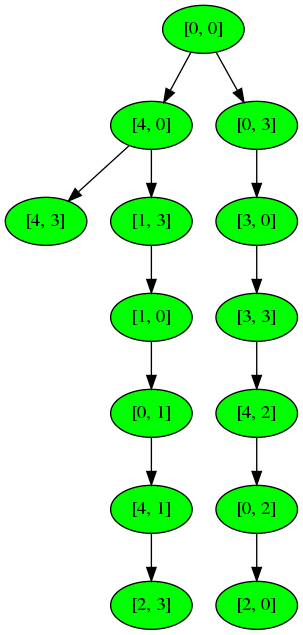

In [12]:
from IPython.display import Image, display
im=Image(G.create_png())
display(im)